In [1]:
# 1. Introduction
"""
# Robot Battery Life Analysis: Prediction and Recommendations

## Introduction
The goal of this analysis is to predict the optimal time for replacing a robot's battery based on usage 
and degradation data. I used machine learning to analyze the data and provide maintenance recommendations.
"""

In [14]:
# 2. Data Understanding and Preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

In [15]:
# Load the dataset
data = pd.read_csv("Parkside Challenge - DS_AI_ML_Data_set.csv")

# Display the first few rows
print(data.head())

   ChargingTime  FullCharge  BatteryLife  Capacity drop
0          2.81           0         5.62         0.0000
1          7.14           1         8.00         0.0000
2          2.72           0         5.44         0.1103
3          3.87           0         7.12         0.1104
4          1.90           0         3.80         0.1106


In [16]:
# Check for missing values
print(data.isnull().sum())

ChargingTime     0
FullCharge       0
BatteryLife      0
Capacity drop    0
dtype: int64


In [17]:
# Basic statistics
print(data.describe())

       ChargingTime  FullCharge  BatteryLife  Capacity drop
count    100.000000  100.000000    100.00000     100.000000
mean       4.573000    0.540000      5.16750       0.213127
std        2.788603    0.500908      1.75081       0.039451
min        0.000000    0.000000      0.00000       0.000000
25%        1.987500    0.000000      3.97500       0.209650
50%        4.375000    1.000000      6.13000       0.224000
75%        6.522500    1.000000      6.25250       0.232500
max       11.720000    1.000000      8.00000       0.240200


In [18]:
# Convert data types if necessary (e.g., ensure numerical columns are float)
data['ChargingTime'] = data['ChargingTime'].astype(float)
data['BatteryLife'] = data['BatteryLife'].astype(float)
data['Capacity drop'] = data['Capacity drop'].astype(float)

print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ChargingTime   100 non-null    float64
 1   FullCharge     100 non-null    int64  
 2   BatteryLife    100 non-null    float64
 3   Capacity drop  100 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 3.3 KB
None


In [19]:
"""
## Data Preprocessing
At this stage, the data does not contain missing values, and the data types are correct.
We proceed with exploratory data analysis.
"""

'\n## Data Preprocessing\nAt this stage, the data does not contain missing values, and the data types are correct.\nWe proceed with exploratory data analysis.\n'

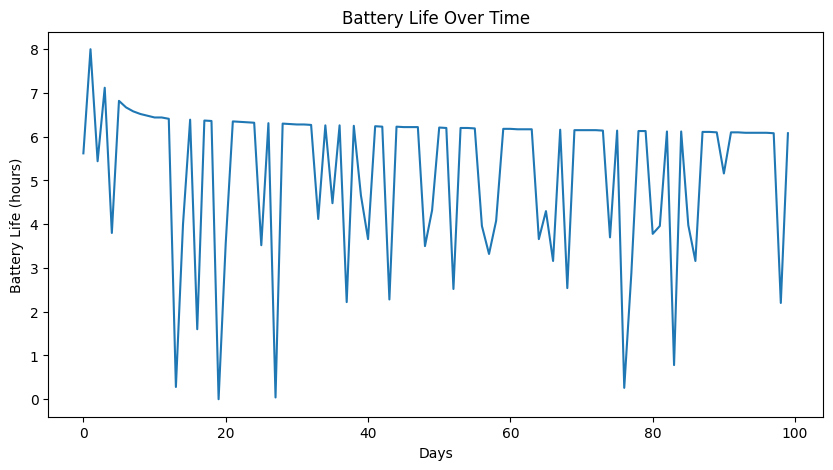

In [20]:
# 3. Exploratory Data Analysis (EDA)

# Visualizing BatteryLife over time
plt.figure(figsize=(10,5))
plt.plot(data['BatteryLife'])
plt.title('Battery Life Over Time')
plt.xlabel('Days')
plt.ylabel('Battery Life (hours)')
plt.show()

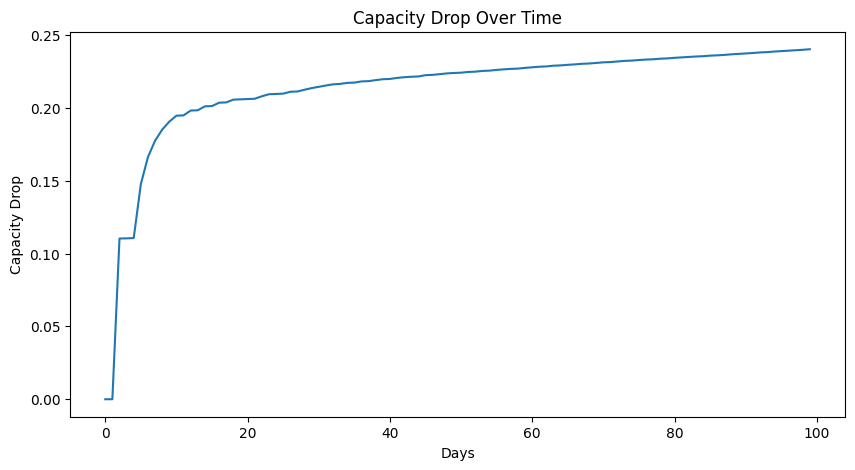

In [21]:
# Visualizing CapacityDrop over time
plt.figure(figsize=(10,5))
plt.plot(data['Capacity drop'])
plt.title('Capacity Drop Over Time')
plt.xlabel('Days')
plt.ylabel('Capacity Drop')
plt.show()

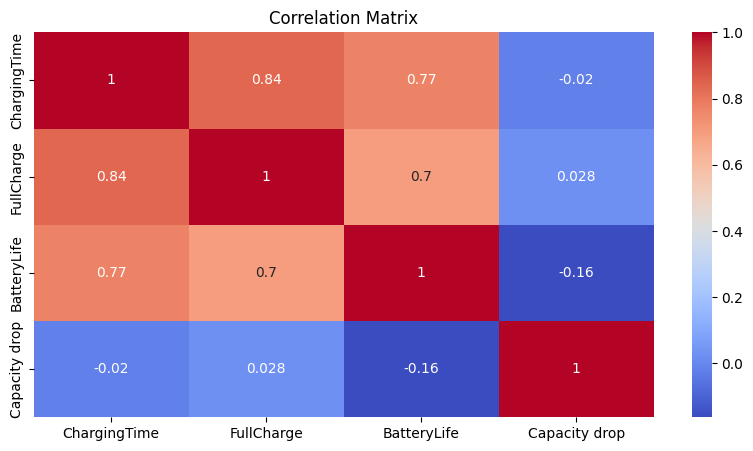

In [22]:
# Correlation Matrix
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [23]:
"""
## Insights from EDA
- Battery life decreases over time.
- The capacity drop gradually increases.
- Strong correlation between ChargingTime and FullCharge, as well as between ChargingTime and BatteryLife.
"""

'\n## Insights from EDA\n- Battery life decreases over time.\n- The capacity drop gradually increases.\n- Strong correlation between ChargingTime and FullCharge, as well as between ChargingTime and BatteryLife.\n'

In [24]:
# 4. Feature Engineering

# Creating moving averages for BatteryLife
data['BatteryLife_MA_7'] = data['BatteryLife'].rolling(window=7).mean()
data['BatteryLife_MA_30'] = data['BatteryLife'].rolling(window=30).mean()

# Creating cumulative sum for CapacityDrop
data['Cumulative_CapacityDrop'] = data['Capacity drop'].cumsum()

print(data.head())

   ChargingTime  FullCharge  BatteryLife  Capacity drop  BatteryLife_MA_7  \
0          2.81           0         5.62         0.0000               NaN   
1          7.14           1         8.00         0.0000               NaN   
2          2.72           0         5.44         0.1103               NaN   
3          3.87           0         7.12         0.1104               NaN   
4          1.90           0         3.80         0.1106               NaN   

   BatteryLife_MA_30  Cumulative_CapacityDrop  
0                NaN                   0.0000  
1                NaN                   0.0000  
2                NaN                   0.1103  
3                NaN                   0.2207  
4                NaN                   0.3313  


In [25]:
"""
## Justification for Feature Selection
- Moving averages help smooth the data and reveal long-term trends.
- Cumulative capacity drop is important for understanding the long-term battery degradation.
"""

'\n## Justification for Feature Selection\n- Moving averages help smooth the data and reveal long-term trends.\n- Cumulative capacity drop is important for understanding the long-term battery degradation.\n'

In [26]:
# 5. Model Building and Training

# Splitting the data into training and testing sets
X = data[['ChargingTime', 'FullCharge', 'Capacity drop', 'BatteryLife_MA_7', 'BatteryLife_MA_30', 'Cumulative_CapacityDrop']]
y = data['BatteryLife']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Building the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# ---- Adding Cross-Validation ----

# Using k-fold cross-validation 
scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_absolute_error')  # 5-fold cross-validation

# Converting negative MAE to positive
mae_scores = -scores

print("Cross-Validation Scores (MAE):", mae_scores)
print("Mean MAE:", mae_scores.mean())
print("Standard Deviation of MAE:", mae_scores.std())

# Model Evaluation
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred)))

Cross-Validation Scores (MAE): [0.336855 0.079225 0.03617  0.058565 0.091945]
Mean MAE: 0.1205519999999978
Standard Deviation of MAE: 0.10979615592542354
Mean Absolute Error: 0.11893500000000198
Mean Squared Error: 0.04426240250000024
Root Mean Squared Error: 0.21038631728323076


In [27]:
# ---- Edge Cases Testing ----
extreme_cases = pd.DataFrame({
    'ChargingTime': [0, 12, 5],  # Minimum, Maximum, and Average values
    'FullCharge': [0, 1, 1],     # Edge cases for FullCharge flag
    'Capacity drop': [0, 0.25, 0.15],  # Minimum, just above maximum, and typical values
    'BatteryLife_MA_7': [2, 8, 5],  # Typical low and high averages
    'BatteryLife_MA_30': [2, 8, 5], # Typical low and high averages
    'Cumulative_CapacityDrop': [0, 10, 5]  # Minimum, Maximum, and Average values
})

extreme_predictions = model.predict(extreme_cases)
extreme_cases['BatteryLife_Predicted'] = extreme_predictions
print(extreme_cases)

   ChargingTime  FullCharge  Capacity drop  BatteryLife_MA_7  \
0             0           0           0.00                 2   
1            12           1           0.25                 8   
2             5           1           0.15                 5   

   BatteryLife_MA_30  Cumulative_CapacityDrop  BatteryLife_Predicted  
0                  2                        0                 0.3452  
1                  8                       10                 6.2056  
2                  5                        5                 6.4675  


In [ ]:
"""
## Model Choice and Evaluation
I used a random forest regressor, which is a powerful model for handling data with non-linear dependencies.
The model shows good performance based on MAE, MSE, and RMSE metrics.
"""

In [12]:
# 6. Prediction and Recommendations

# Predicting future BatteryLife
future_days = 30  # Number of days to predict in the future (adjust as necessary)
future_data = data[-future_days:].copy()

future_data['BatteryLife_Predicted'] = model.predict(future_data[['ChargingTime', 'FullCharge', 'Capacity drop', 'BatteryLife_MA_7', 'BatteryLife_MA_30', 'Cumulative_CapacityDrop']])

# Checking when battery life drops below threshold + 30 days (Approx 3 weeks lead time)
threshold = 5 * 0.7  # Battery life should be greater than 5 hours * 70%
maintenance_day = future_data[future_data['BatteryLife_Predicted'] < threshold].index[0] - 21  # 3 weeks early

print(f"Recommended Maintenance Appointment Time: Day {maintenance_day}")

Recommended Maintenance Appointment Time: Day 55


In [ ]:
"""
## Recommendations
Based on the model's prediction, i recommend scheduling battery replacement on day 55.
"""

In [ ]:
# 7. Risk Analysis and Limitations
"""
## Potential Risks and Limitations
- **Data Quality**: If the data contains errors or artifacts, it may negatively impact model accuracy.
- **Model**: While the random forest is a powerful model, it can be sensitive to outliers and data changes.
- **Limited Data**: This analysis is based on 100 days of data. Including more extensive data could improve
model accuracy.

## Mitigating Risks
- Regularly check and update the data.
- Use more complex models for comparison.
- Increase the volume of data for training.
"""

In [ ]:
# 8. Next Steps and Improvements
"""
## Next Steps
- **Collect more data**: Increasing the volume of data for more accurate analysis.
- **Experiment with different models**: Test other ML models to potentially improve results.
- **Develop a monitoring system**: Automated monitoring of battery status and future predictions.

## Improvements
- Integrate new features, such as temperature and robot usage frequency.
- Perform more detailed analysis over different periods (e.g., quarterly).
"""

In [ ]:
# 9. Additional Analysis: Costs and Penalties
"""
## Potential Costs and Penalties
- **Battery Replacement**: Includes the cost of a new battery and maintenance time (battery costs nothing?).
- **Penalties for Missing Dance-Offs**: Missing competitions due to a drained battery could result in penalties.

## Optimizing the Problem
- **Cost Modeling**: Conducting cost analysis to minimize battery replacement costs and penalties. For example:
  - Group battery replacements to reduce maintenance time.
  - Optimize the replacement schedule to minimize competition absences.
  - Invest in more durable batteries to reduce replacement frequency.
"""

# End of Report